In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

import os
import glob


from PIL import Image
import os, glob

2.2.0


### Data 구성 방법

In [17]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2041   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    print(idx)
    
    for file in glob.iglob(img_path+'/rock*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    print(idx)
   
    for file in glob.iglob(img_path+'/paper*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    print(idx)
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EX1/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

632
1322
2041
학습데이터(x_train)의 이미지 개수는 2041 입니다.
x_train shape: (2041, 28, 28, 3)
y_train shape: (2041,)


라벨:  0


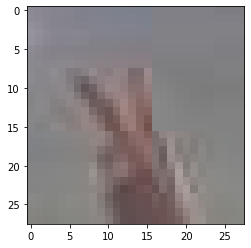

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 모델 구성 방법
#### 데이터를 충분히 받기 위해 여러 조의 데이터를 모았습니다
#### 컨볼루션 레이어와 덴스레이어를 더 늘려보거나, 차원을 조절 해보면서 가장 좋은 네트워크를 찾고자했습니다
#### 특히, 덴스레이어를 쌓을 때, 테스트 어큐러시가 확 올라가는 것을 확인할 수 있었습니다.
#### 맥스풀링도 조절해 봤습니다.

In [19]:

model=keras.models.Sequential()
#model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                73792     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

## 최종학습기법

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

model.summary()

Epoch 1/10
64/64 [==============================] - 1s 8ms/step - loss: 1.0650 - accuracy: 0.4277
Epoch 2/10
64/64 [==============================] - 1s 8ms/step - loss: 0.9170 - accuracy: 0.5625
Epoch 3/10
64/64 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.7109
Epoch 4/10
64/64 [==============================] - 1s 8ms/step - loss: 0.4956 - accuracy: 0.8089
Epoch 5/10
64/64 [==============================] - 1s 8ms/step - loss: 0.3776 - accuracy: 0.8604
Epoch 6/10
64/64 [==============================] - 1s 8ms/step - loss: 0.2684 - accuracy: 0.9138
Epoch 7/10
64/64 [==============================] - 1s 8ms/step - loss: 0.1835 - accuracy: 0.9500
Epoch 8/10
64/64 [==============================] - 1s 8ms/step - loss: 0.1431 - accuracy: 0.9623
Epoch 9/10
64/64 [==============================] - 1s 8ms/step - loss: 0.0847 - accuracy: 0.9848
Epoch 10/10
64/64 [==============================] - 1s 8ms/step - loss: 0.0828 - accuracy: 0.9814
Model: "sequential_

In [21]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EX1/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [22]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0328 - accuracy: 0.9900
test_loss: 0.032758165150880814 
test_accuracy: 0.9900000095367432


## 어떤 라벨이 틀렸나?

In [23]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) # 가장 큰 값을 답으로!

예측확률분포: [9.5520409e-07 4.8010698e-01 5.1989204e-01]
라벨: 1, 예측결과: 2


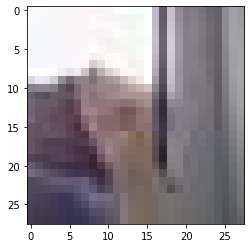

예측확률분포: [8.9306241e-07 4.9655747e-01 5.0344169e-01]
라벨: 1, 예측결과: 2


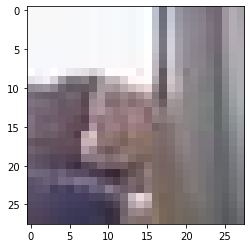

예측확률분포: [2.1980832e-06 4.3401533e-01 5.6598246e-01]
라벨: 1, 예측결과: 2


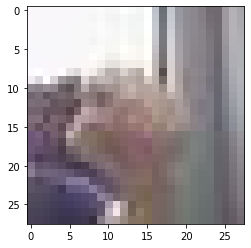

In [24]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

for n in wrong_predict_list:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 특히 흥미로웠던 것은 덴스레이어를 추가할 때랑, 컨벌루션을 쌓을 때와는 다른 라벨이 틀렸다는 것입니다.

### 덴스레이러를 쌓았을 때 컨볼루션을 뻬면 는 주먹 보로 보는경우가 있고/ 컨볼루션을 쌓고 덴스레이어를 빼면 가위를 보로 인식 합니다.  왜 인지는 고민해보겠습니다